# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## 1. Find the 10 countries with most projects

In [140]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#load as pandas dataframe: df
df = pd.read_json('data/world_bank_projects.json')

#identify top 10 countries with most projects: most_countries
most_countries = df.countryshortname.value_counts().head(10)
print(most_countries)


China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


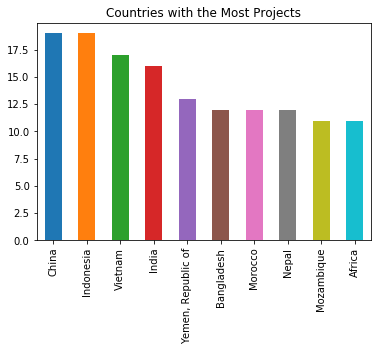

In [145]:
#show bar graph of countries (most_countries)
most_countries.plot(kind='bar', title='Countries with the Most Projects')

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [141]:
import json
import numpy as np

#Open and normalize file: majortheme
with open('data/world_bank_projects.json') as majorfile:
    major_data = json.load(majorfile)
    majortheme = json_normalize(major_data, 'mjtheme_namecode')

#group codes by name; then count and sort values in descending order  
major10 = majortheme.groupby(['name']).size().sort_values(ascending=False)

#print the top 10 major theme projects; Notice that there are 122 missing values
print(major10.head(10))


name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64


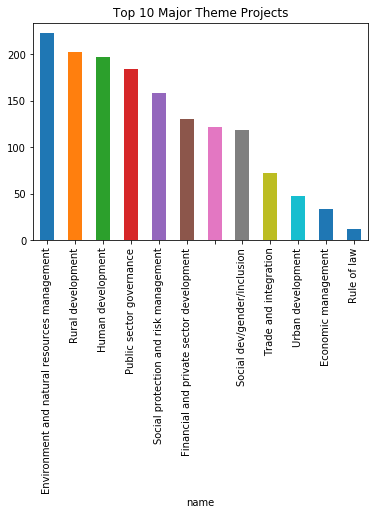

In [142]:
#Plot a bar graph of Top 10 Major Themes. Blank spot shows in missing spaces. 
major10.plot(kind='bar', title='Top 10 Major Theme Projects')

## In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### 1st way to fill in empty spaces using a lambda function

In [143]:
#Use a lambda function to replace empty strings with NaN. Create DataFrame major10fill with NaN values.
major10fill = majortheme.apply(lambda x: x.str.strip()).replace('', np.nan)

#Fill in NaN with ffill into DataFrame major10_ffill
major10_ffill = major10fill.fillna(method='ffill')

#print DataFrame with missing names filled in
print(major10_ffill)



     code                                          name
0       8                             Human development
1      11                             Human development
2       1                           Economic management
3       6         Social protection and risk management
4       5                         Trade and integration
5       2                      Public sector governance
6      11  Environment and natural resources management
7       6         Social protection and risk management
8       7                   Social dev/gender/inclusion
9       7                   Social dev/gender/inclusion
10      5                         Trade and integration
11      4      Financial and private sector development
12      6         Social protection and risk management
13      6         Social protection and risk management
14      2                      Public sector governance
15      4      Financial and private sector development
16     11  Environment and natural resources man

### 2nd way to fill in empty spaces using .replace()

In [144]:
#replace an empty string ('') with NaN
df_replace = majortheme.replace(r'', np.nan, regex=True)

#Fill in NaN with ffill into DataFrame df_replace
major10_replace = df_replace.fillna(method='ffill')

#print DataFrame (major10_replace) with missing names filled in
print(major10_replace)

     code                                          name
0       8                             Human development
1      11                             Human development
2       1                           Economic management
3       6         Social protection and risk management
4       5                         Trade and integration
5       2                      Public sector governance
6      11  Environment and natural resources management
7       6         Social protection and risk management
8       7                   Social dev/gender/inclusion
9       7                   Social dev/gender/inclusion
10      5                         Trade and integration
11      4      Financial and private sector development
12      6         Social protection and risk management
13      6         Social protection and risk management
14      2                      Public sector governance
15      4      Financial and private sector development
16     11  Environment and natural resources man